<a href="https://colab.research.google.com/github/uoscar-s-urrego/TEY-old/blob/main/Pr%C3%A9diction_TEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DENG Mingjie and URREGO Oscar

##Dataset: Gas Turbine CO and NOx Emission Data Set
Dataset original source url: https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set

Dataset description: The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

Project aims: Predict turbine energy yield (TEY) with ML.


In [ ]:
pip install ucimlrepo

# 1. Libraries import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

import seaborn as sns

import math

from ucimlrepo import fetch_ucirepo

# 2. Get dataset


##2.1. As recomended by the dataset owner

In [ ]:


# fetch dataset
gas_turbine_co_and_nox_emission_data_set = fetch_ucirepo(id=551)

# data (as pandas dataframes)
X = gas_turbine_co_and_nox_emission_data_set.data.features
y = gas_turbine_co_and_nox_emission_data_set.data.targets

# metadata
print(gas_turbine_co_and_nox_emission_data_set.metadata)

# variable information
print(gas_turbine_co_and_nox_emission_data_set.variables)


{'uci_id': 551, 'name': 'Gas Turbine CO and NOx Emission Data Set', 'repository_url': 'https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/551/data.csv', 'abstract': 'The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.', 'area': 'Computer Science', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 36733, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5WC95', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by mea

##2.2. Using simply pandas

In [ ]:
emission_data = pd.read_csv('https://archive.ics.uci.edu/static/public/551/data.csv')

data, target = emission_data.drop(columns='TEY'), emission_data['TEY'] # divide de data to define the target column TEY

#time1=0.00010061264038085938 + 1.6870999336242676 with fetch
#time2=0.0017719268798828125 + 0.6281914710998535 with pandas only

We performed time measurements to check which of the 2 ways of calling the data was more eficient. We noticed that using just the pandas' read_csv method the time spent was shorter so we chose that instance to continue with the treatment of the data

# 3. Explore and visualize the data

## 3.1. Data exploration

In [ ]:
data.info()
print('---------------------------------------------------')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    36733 non-null  int64  
 1   AT      36733 non-null  float64
 2   AP      36733 non-null  float64
 3   AH      36733 non-null  float64
 4   AFDP    36733 non-null  float64
 5   GTEP    36733 non-null  float64
 6   TIT     36733 non-null  float64
 7   TAT     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 3.1 MB
---------------------------------------------------


,year,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,2011,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952
1,2011,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377
2,2011,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776
3,2011,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505
4,2011,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028


In [ ]:
data.select_dtypes(include=['float'])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.738


In [ ]:
data.describe()

,year,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,2012.985735,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,12.060525,2.372468,65.293067
std,1.418965,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,1.088795,2.262672,11.678357
min,2011.000000,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,9.851800,0.000388,25.905000
25%,2012.000000,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,11.435000,1.182400,57.162000
50%,2013.000000,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,11.965000,1.713500,63.849000
75%,2014.000000,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,12.855000,2.842900,71.548000
max,2015.000000,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,15.159000,44.103000,119.910000


## 3.2. Data visualization

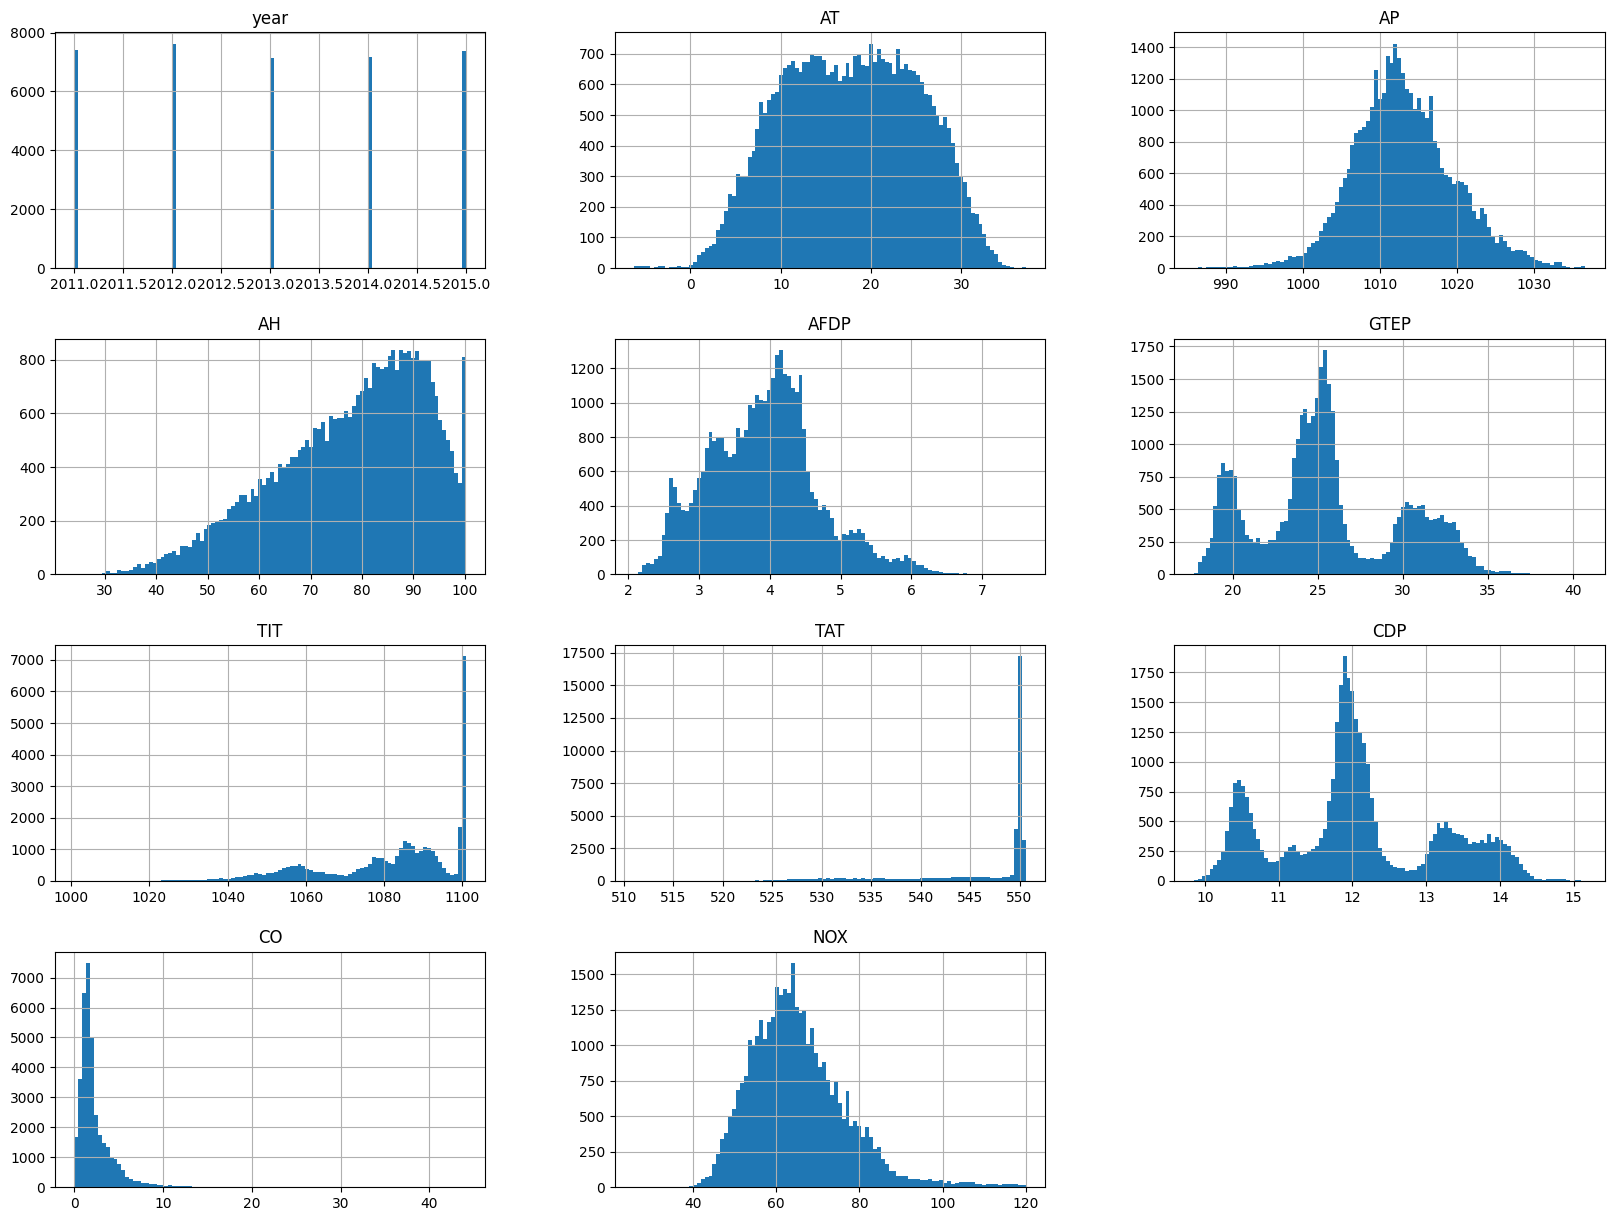

In [ ]:
data.hist(bins=100, figsize=(20,15))
plt.show()

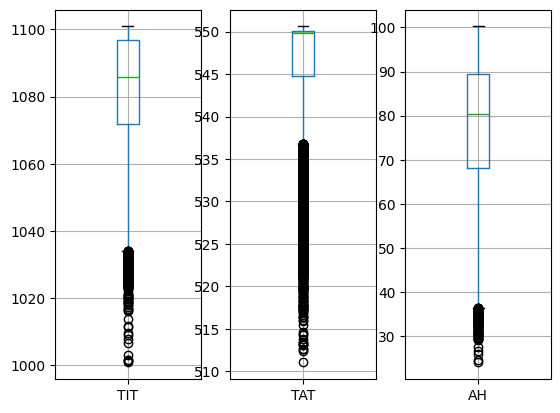

In [ ]:
# should we do all the boxplots? should we eliminate the outliers and how?
plt.subplot(1,3,1)
data.boxplot(column='TIT')
plt.subplot(1,3,2)
data.boxplot(column='TAT')
plt.subplot(1,3,3)
data.boxplot(column='AH')
plt.show()

#4. Divide data into testing and training groups

Following the protocol mentioned in the paper (using the first three years' data for training/ cross-validation and the last two for testing) for reproducibility and comparability of works:

In [ ]:
# Split as advised by the data frame owners
train=data[data['year'] <= 2013].copy()
test=data[data['year'] > 2013].copy()

# Split data randomly
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

#5. Correlations

          year        AT        AP        AH      AFDP      GTEP       TIT  \
year  1.000000  0.000217  0.018595 -0.177964 -0.254326  0.050643 -0.125743   
AT    0.000217  1.000000 -0.406601 -0.476291  0.251974  0.045851  0.183706   
AP    0.018595 -0.406601  1.000000 -0.015184 -0.040363  0.057533 -0.005390   
AH   -0.177964 -0.476291 -0.015184  1.000000 -0.147840 -0.235153 -0.221809   
AFDP -0.254326  0.251974 -0.040363 -0.147840  1.000000  0.678485  0.691292   
GTEP  0.050643  0.045851  0.057533 -0.235153  0.678485  1.000000  0.874234   
TIT  -0.125743  0.183706 -0.005390 -0.221809  0.691292  0.874234  1.000000   
TAT   0.116287  0.281869 -0.225601  0.022965 -0.466882 -0.699703 -0.380862   
CDP  -0.025415  0.015287  0.102636 -0.196275  0.702568  0.978470  0.908469   
CO    0.178450 -0.174326  0.067050  0.106586 -0.448425 -0.518909 -0.706275   
NOX  -0.291920 -0.558174  0.191938  0.164617 -0.188247 -0.201630 -0.213865   

           TAT       CDP        CO       NOX  
year  0.116287 -

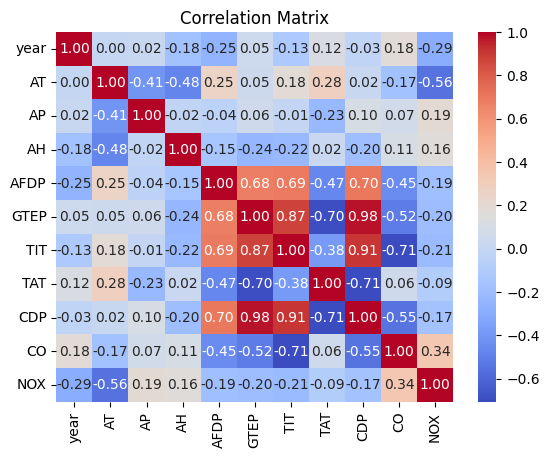

High correlation pairs:


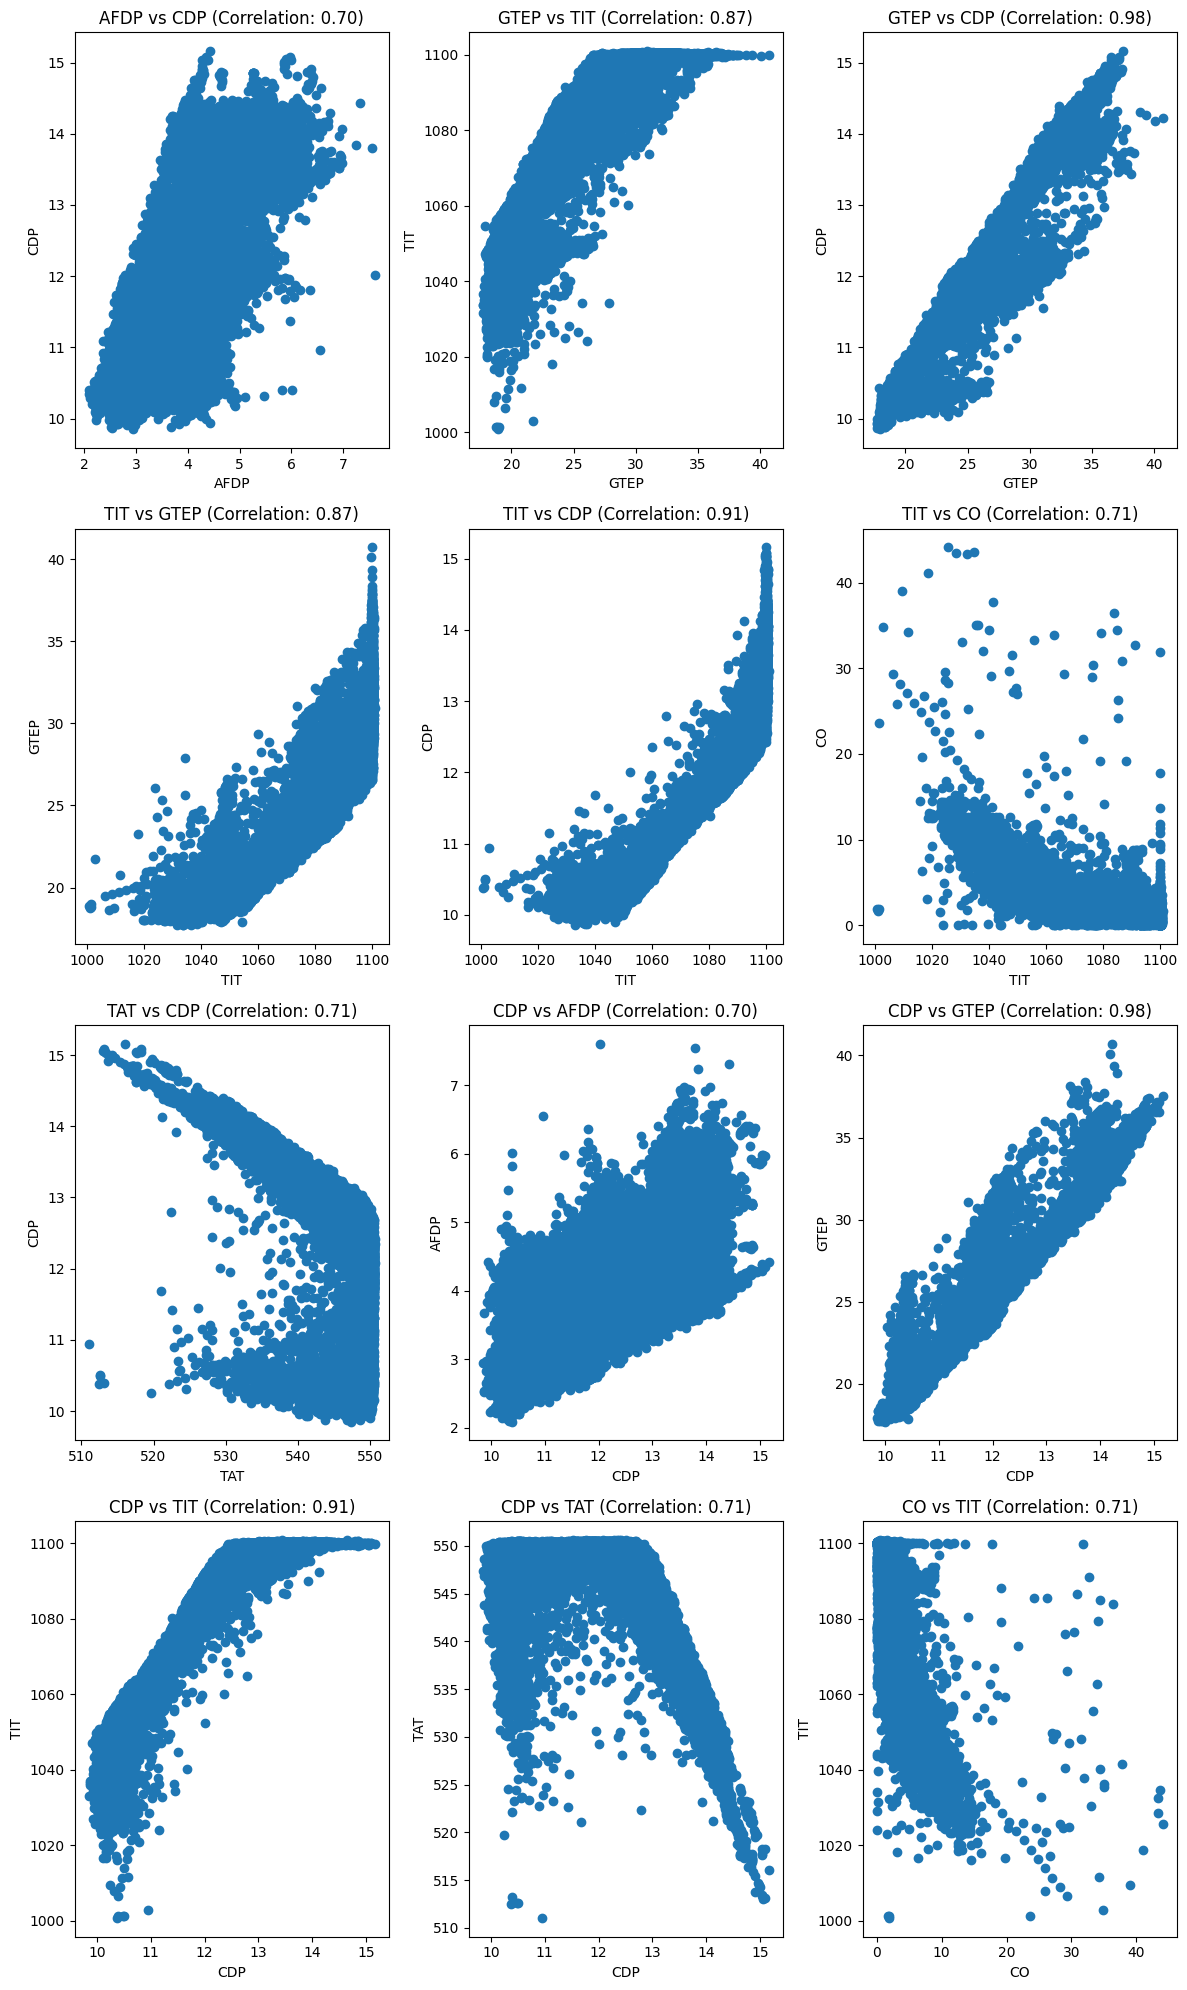

In [ ]:
# Calculate correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Filter pairs of columns with correlation higher than  0.7
correlation_matrix = corr_matrix.abs()

high_corr_pairs = [
    (column1, column2)
    for column1 in correlation_matrix.columns
    for column2 in correlation_matrix.columns
    if column1 != column2 and correlation_matrix.loc[column1, column2] > 0.7
]

# Plot high correlation pairs
print("High correlation pairs:")
n_pairs = len(high_corr_pairs)
n_cols = 3
n_rows = math.ceil(n_pairs / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

axes = axes.flatten()

for i, (col1, col2) in enumerate(high_corr_pairs):
    axes[i].scatter(data[col1], data[col2])
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].set_title(f'{col1} vs {col2} (Correlation: {correlation_matrix.loc[col1, col2]:.2f})')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()